In [4]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.6 MB/s eta 0:00:00


In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [7]:
preco = ctrl.Antecedent(np.arange(40000, 100000, 1), 'preco')
consumo = ctrl.Antecedent(np.arange(11, 18, 1), 'consumo')

beneficio = ctrl.Consequent(np.arange(0, 11, 0.5), 'beneficio')

In [8]:
preco.automf(number=3, names=['baixo', 'medio', 'alto'])
consumo.automf(number=3, names=['alto', 'medio', 'baixo'])


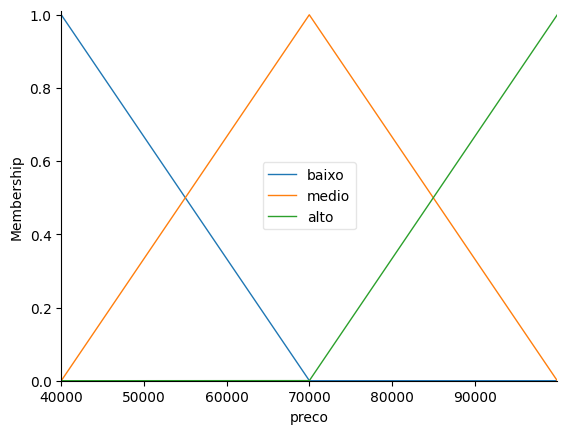

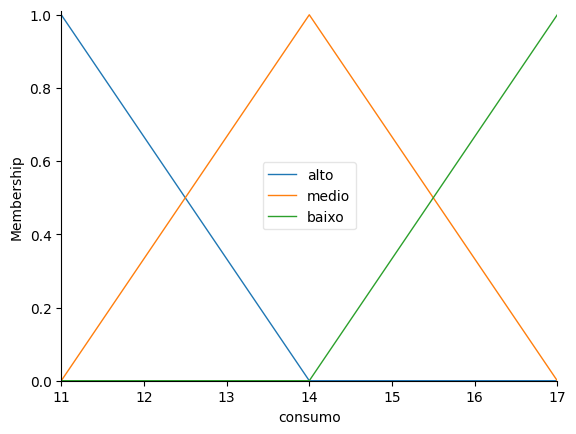

In [9]:
preco.view()
consumo.view()

In [10]:
beneficio['baixo'] = fuzz.trimf(beneficio.universe, [0, 2.5, 5])
beneficio['medio'] = fuzz.trimf(beneficio.universe, [2.5, 5, 7.5])
beneficio['alto'] = fuzz.trimf(beneficio.universe, [5, 7.5, 10])

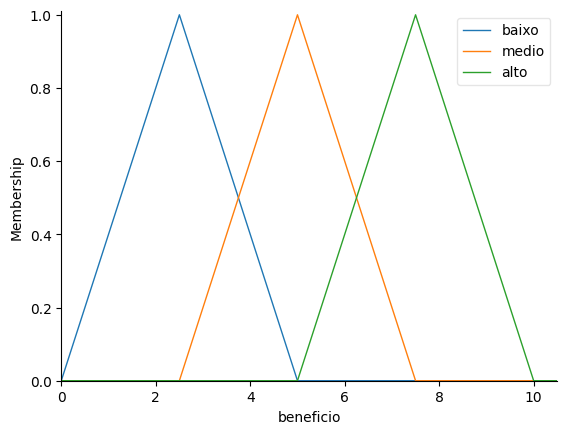

In [11]:
beneficio.view()

In [17]:
regra1 = ctrl.Rule(preco['baixo'] | consumo['baixo'], beneficio['alto'])
regra2 = ctrl.Rule(preco['baixo'] | consumo['medio'], beneficio['medio'])
regra3 = ctrl.Rule(preco['medio'] | consumo['baixo'], beneficio['medio'])
regra4 = ctrl.Rule(preco['medio'] | consumo['medio'], beneficio['medio'])
regra5 = ctrl.Rule(preco['medio'] | consumo['alto'], beneficio['medio'])
regra6 = ctrl.Rule(preco['alto'] | consumo['medio'], beneficio['medio'])
regra7 = ctrl.Rule(preco['alto'] | consumo['alto'], beneficio['baixo'])
regra8 = ctrl.Rule(preco['baixo'] | consumo['alto'], beneficio['medio'])
regra9 = ctrl.Rule(preco['alto'] | consumo['baixo'], beneficio['medio'])

In [19]:
recomendacao_compra = ctrl.ControlSystem([
    regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9
])

recomendacao = ctrl.ControlSystemSimulation(recomendacao_compra)

In [20]:
recomendacao.input['preco'] = 50000
recomendacao.input['consumo'] = 16
recomendacao.compute()

6.25


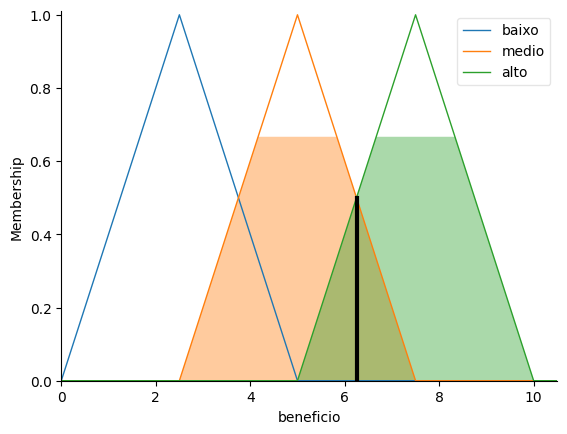

In [21]:
print(recomendacao.output['beneficio'])
beneficio.view(sim = recomendacao)

1) Por que um sistema baseado em lógica fuzzy pode ser considerado um sistema inteligente?

A lógica fuzzy pode simular o raciocínio humano em situações complexas e incertas, ou seja, oferece uma solução prática com base em aproximações, o que é uma das características dos sistemas inteligentes.

2) Qual é a diferença entre a Lógica tradicional e a Lógica Fuzzy?

Enquanto a lógica tradicional ou lógica Booleana trabalha apenas com dois valores lógicos, 0 (falso) e 1 (verdadeiro), a lógica fuzzy trabalha com uma faixa de valores entre 0 e 1, o que a torna excelente para lidar com valores imprecisos ou subjetivos, como controle de temperatura, avaliação de riscos etc.

3) Explique o que é o grau de verdade ou grau de pertinência.

É um número real entre 0 e 1 que indica o quanto um elemento pertence a um conjunto fuzzy. 0 significa que o elemento não pertence ao conjunto, e 1 pertence completamente ao conjunto, já valores intermediários indicam uma pertinência parcial.

4) Quais vantagens os sistemas especialistas difusos têm em relação aos sistemas especialistas tradicionais?

A principal vantagem está em casos de uso que envolvem incerteza, imprecisão ou conhecimento subjetivo, já que a lógica tradicional não lida bem com mudanças pequenas e não se adaptam bem ao raciocínio humano.

5) A partir da implementação em Python realizada, apresente, com gráficos e valores, exemplos que apresentam custo-benefício médio e alto.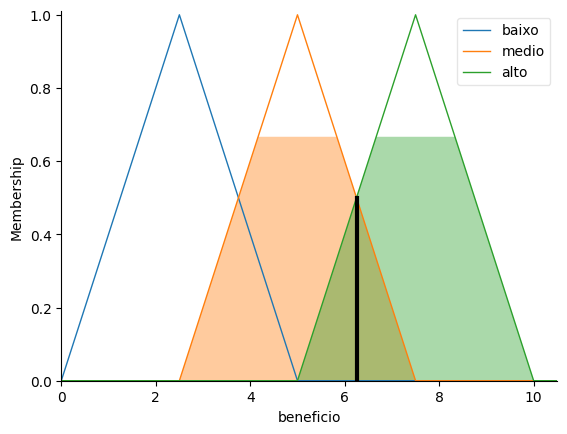
